In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [2]:
users = pd.read_csv('Dataset/Users/users.csv')
train = pd.read_csv('Dataset/Tweets/train_tweets.csv')
test = pd.read_csv('Dataset/Tweets/test_tweets.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [3]:
#number of data
print(users.shape, train.shape, test.shape)

(52, 11) (29625, 14) (12697, 13)


In [4]:
users.info()
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   user_id                52 non-null     int64
 1   user_like_count        52 non-null     int64
 2   user_followers_count   52 non-null     int64
 3   user_following_count   52 non-null     int64
 4   user_listed_on_count   52 non-null     int64
 5   user_has_location      52 non-null     bool 
 6   user_tweet_count       52 non-null     int64
 7   user_has_url           52 non-null     bool 
 8   user_verified          52 non-null     int64
 9   user_created_at_year   52 non-null     int64
 10  user_created_at_month  52 non-null     int64
dtypes: bool(2), int64(9)
memory usage: 3.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29625 entries, 0 to 29624
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  ---------

### Null & Duplicate Values

In [5]:
print('\033[1m'+'Train null value: \n' + '\033[0m',train.isnull().sum())
print('')
print('\033[1m'+'Test null value: \n' + '\033[0m',test.isnull().sum())
print('')
print('\033[1m'+'Users null value: \n' + '\033[0m',users.isnull().sum())

Train null value: 
 tweet_id                     0
tweet_user_id                0
tweet_created_at_year        0
tweet_created_at_month       0
tweet_created_at_day         0
tweet_created_at_hour        0
tweet_hashtag_count          0
tweet_url_count              0
tweet_mention_count          0
tweet_has_attachment         0
tweet_attachment_class       0
tweet_language_id            0
tweet_topic_ids           4285
virality                     0
dtype: int64

Test null value: 
 tweet_id                     0
tweet_user_id                0
tweet_created_at_year        0
tweet_created_at_month       0
tweet_created_at_day         0
tweet_created_at_hour        0
tweet_hashtag_count          0
tweet_url_count              0
tweet_mention_count          0
tweet_has_attachment         0
tweet_attachment_class       0
tweet_language_id            0
tweet_topic_ids           1802
dtype: int64

Users null value: 
 user_id                  0
user_like_count          0
user_followers_count  

In [6]:
train.duplicated().sum()

0

In [7]:
test.duplicated().sum()

0

In [8]:
users.duplicated().sum()

0

### Merging

In [9]:
df = train.append(test).reset_index(drop=True)
print(df.shape)
df.isnull().sum()

(42322, 14)


tweet_id                      0
tweet_user_id                 0
tweet_created_at_year         0
tweet_created_at_month        0
tweet_created_at_day          0
tweet_created_at_hour         0
tweet_hashtag_count           0
tweet_url_count               0
tweet_mention_count           0
tweet_has_attachment          0
tweet_attachment_class        0
tweet_language_id             0
tweet_topic_ids            6087
virality                  12697
dtype: int64

In [10]:
df_users = df.merge(users,
                    how='left',
                    left_on='tweet_user_id',
                    right_on='user_id')

In [11]:
df_users.shape

(42322, 25)

In [12]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42322 entries, 0 to 42321
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                42322 non-null  int64  
 1   tweet_user_id           42322 non-null  int64  
 2   tweet_created_at_year   42322 non-null  int64  
 3   tweet_created_at_month  42322 non-null  int64  
 4   tweet_created_at_day    42322 non-null  int64  
 5   tweet_created_at_hour   42322 non-null  int64  
 6   tweet_hashtag_count     42322 non-null  float64
 7   tweet_url_count         42322 non-null  float64
 8   tweet_mention_count     42322 non-null  float64
 9   tweet_has_attachment    42322 non-null  bool   
 10  tweet_attachment_class  42322 non-null  object 
 11  tweet_language_id       42322 non-null  int64  
 12  tweet_topic_ids         36235 non-null  object 
 13  virality                29625 non-null  float64
 14  user_id                 42322 non-null

In [13]:
df_users.head()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids,virality,user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month
0,34698,10,2015,12,5,3,2.0,1.0,0.0,False,C,0,"['36', '36', '36', '36', '36', '36', '37', '37...",3.0,10,9365,398591,136081,18462,True,169980,True,0,2011,10
1,24644,4,2020,6,19,0,0.0,1.0,0.0,False,C,0,"['43', '78', '79', '80', '80', '89', '98', '99...",3.0,4,15311,459083,1021,7368,False,121193,False,0,2011,6
2,36321,54,2019,6,2,15,2.0,3.0,0.0,True,A,0,"['79', '80', '98', '98', '98', '99', '99', '10...",1.0,54,336,447110,584,10519,True,3786,True,0,2011,12
3,2629,42,2020,9,6,17,0.0,1.0,1.0,True,A,0,"['43', '79', '80', '98', '99', '99', '79', '80']",2.0,42,1124,276541,758,6163,True,3264,True,0,2011,9
4,28169,32,2020,11,4,17,2.0,1.0,0.0,True,A,0,"['79', '80', '98', '99', '43', '89']",2.0,32,0,1587783,2,16414,False,2022,True,0,2013,7


In [14]:
cats = list(df_users.select_dtypes(include=['object','bool']))
nums = list(df_users.drop(columns=cats, axis=1))
nums.remove('virality')
nums.remove('tweet_id')
nums.remove('tweet_user_id')
nums.remove('user_id')

In [15]:
print('No of Features:', len(cats))
print('No of Features:', len(nums))

No of Features: 5
No of Features: 16


# Exploratory Data Analysis

### Descriptive Statistics

In [16]:
df_users[nums].describe()

,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_language_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_tweet_count,user_verified,user_created_at_year,user_created_at_month
count,42322.000000,42322.000000,42322.000000,42322.000000,42322.000000,42322.000000,42322.000000,42322.000000,42322.000000,4.232200e+04,4.232200e+04,42322.000000,42322.000000,42322.000000,42322.000000,42322.000000
mean,2019.003804,7.057299,15.777255,15.027385,1.052597,1.214522,0.636383,0.157814,4808.997826,2.501291e+05,4.272095e+04,7061.074926,40443.057370,0.003851,2011.163556,7.262062
std,1.447084,3.521000,8.887043,5.237429,1.127291,0.981665,1.006551,1.265745,5702.292851,3.685248e+05,1.569190e+05,7735.681808,77152.771916,0.061941,1.226002,3.312481
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.632000e+03,0.000000e+00,276.000000,96.000000,0.000000,2008.000000,1.000000
25%,2019.000000,4.000000,8.000000,13.000000,0.000000,1.000000,0.000000,0.000000,1299.000000,2.312700e+04,1.235000e+03,1891.000000,7065.000000,0.000000,2011.000000,5.000000
50%,2019.000000,8.000000,16.000000,16.000000,1.000000,1.000000,0.000000,0.000000,2855.000000,8.918000e+04,2.817000e+03,4560.000000,12265.000000,0.000000,2011.000000,8.000000
75%,2020.000000,10.000000,24.000000,19.000000,2.000000,2.000000,1.000000,0.000000,6609.000000,3.628020e+05,1.199400e+04,9012.000000,30400.000000,0.000000,2012.000000,10.000000
max,2021.000000,12.000000,31.000000,23.000000,14.000000,8.000000,16.000000,30.000000,33091.000000,1.587783e+06,1.118149e+06,38838.000000,432467.000000,1.000000,2014.000000,12.000000


In [17]:
df_users[cats].describe()

,tweet_has_attachment,tweet_attachment_class,tweet_topic_ids,user_has_location,user_has_url
count,42322,42322,36235,42322,42322
unique,2,3,5442,2,2
top,True,A,"['78', '79', '80']",True,True
freq,25421,25016,5766,28769,38123


* From `tweet_topic_ids` we may interpret that it seems tweets with topic id 78,79 & 80 are the most booming tweets at the time
* More than 50% of the tweets has an attachment and most of them has attachment class **'A'**

### Visualization

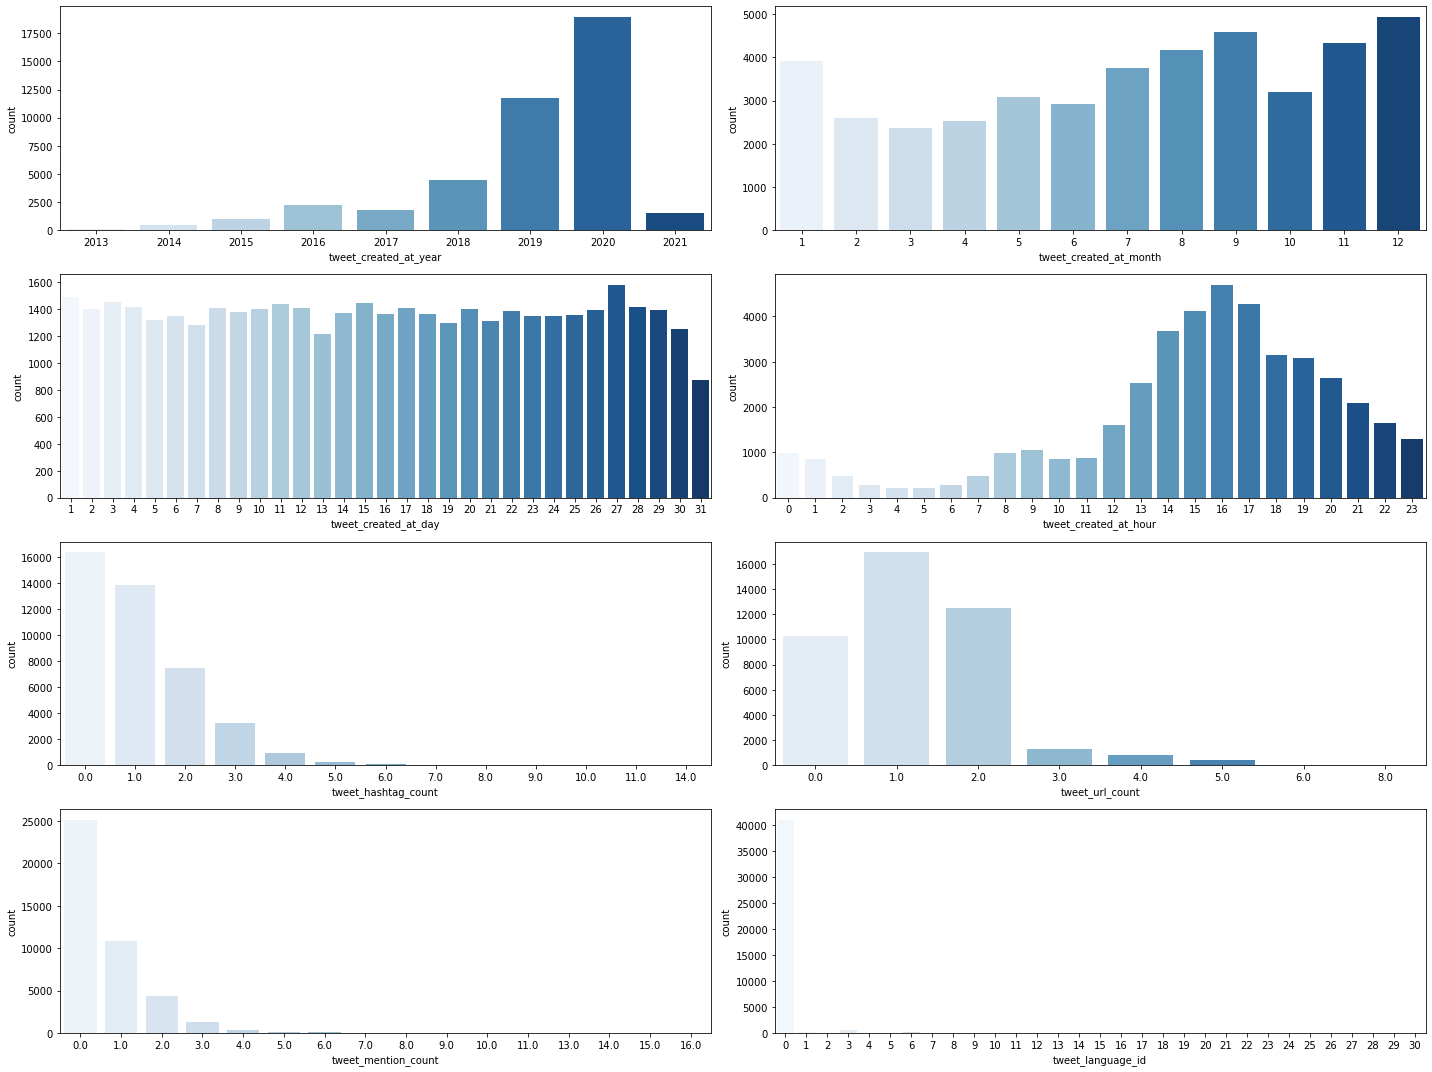

In [18]:
plt.figure(figsize=(20,15))
for i in range(0,8):
    plt.subplot(4,2,i+1)
    sns.countplot(x=nums[i], data=df_users, palette='Blues')
plt.tight_layout()

* Most of the tweets created in 2020
* The month of a tweet created mostly in December (12)
* Also most of the tweets created on 27th day
* Most of the tweets has 0 hashtag & mention

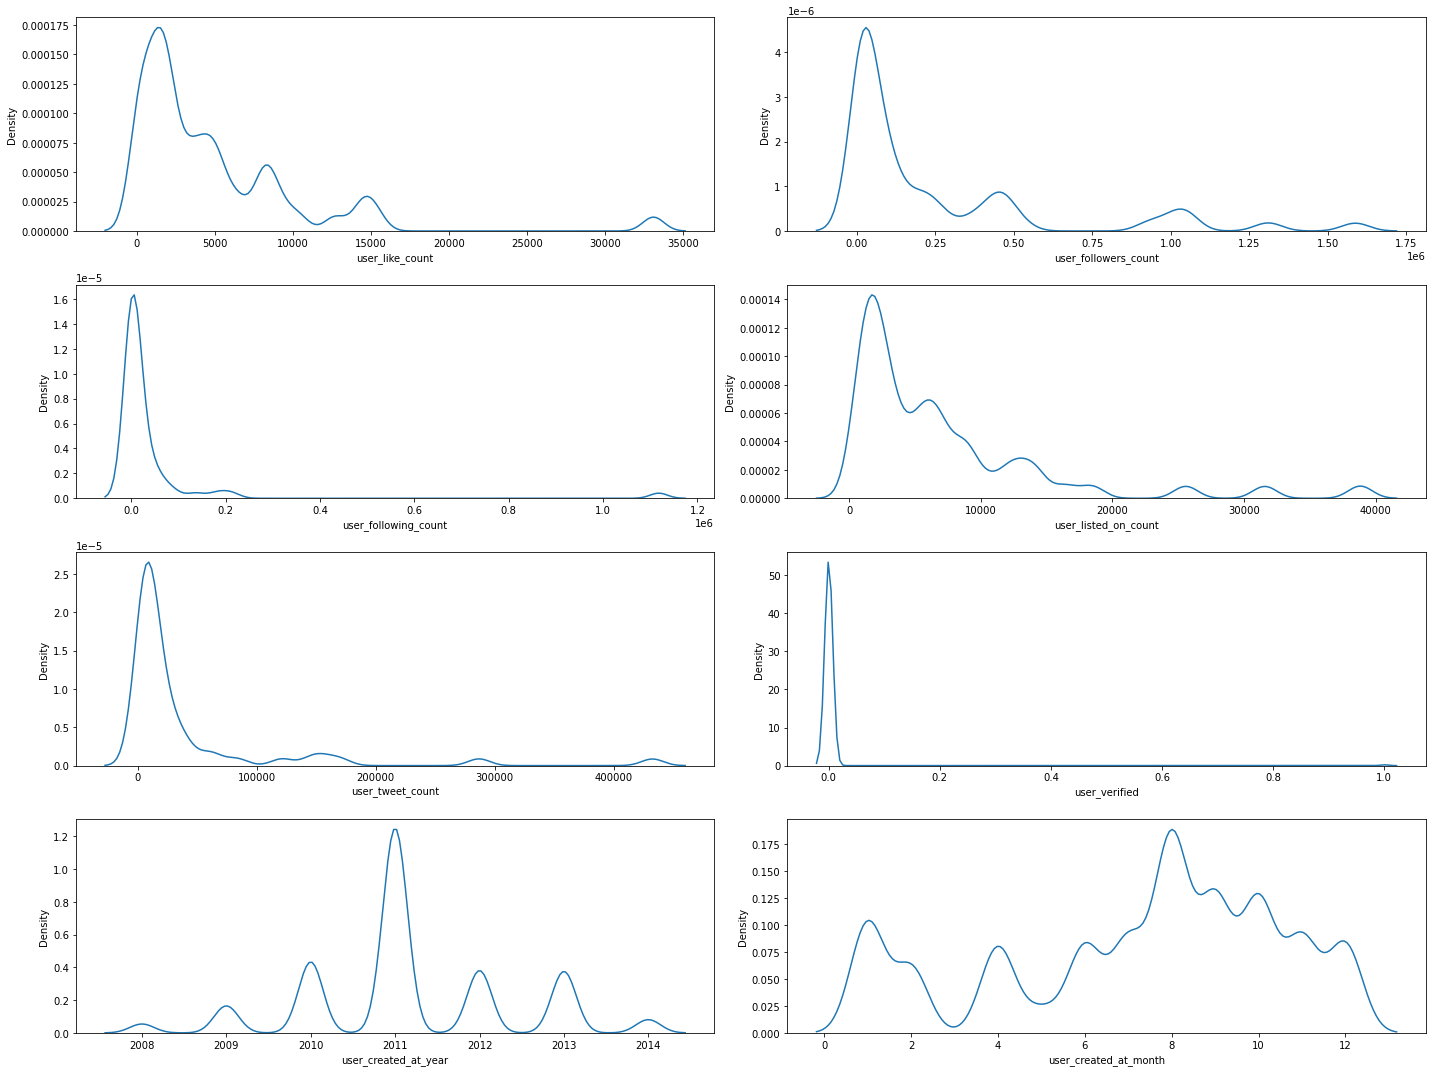

In [19]:
plt.figure(figsize=(20,15))
for i in range(0,len(['user_like_count','user_followers_count','user_following_count','user_listed_on_count','user_tweet_count','user_verified','user_created_at_year','user_created_at_month'])):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data=df_users, x=['user_like_count','user_followers_count','user_following_count','user_listed_on_count','user_tweet_count','user_verified','user_created_at_year','user_created_at_month'][i], palette='Blues')
plt.tight_layout()

* Most of numerical data such as user's demographic are unevenly distributed, specifically might be categorized as **Positively Skewed Distribution**
* Most of users in the data are not verified

<AxesSubplot:>

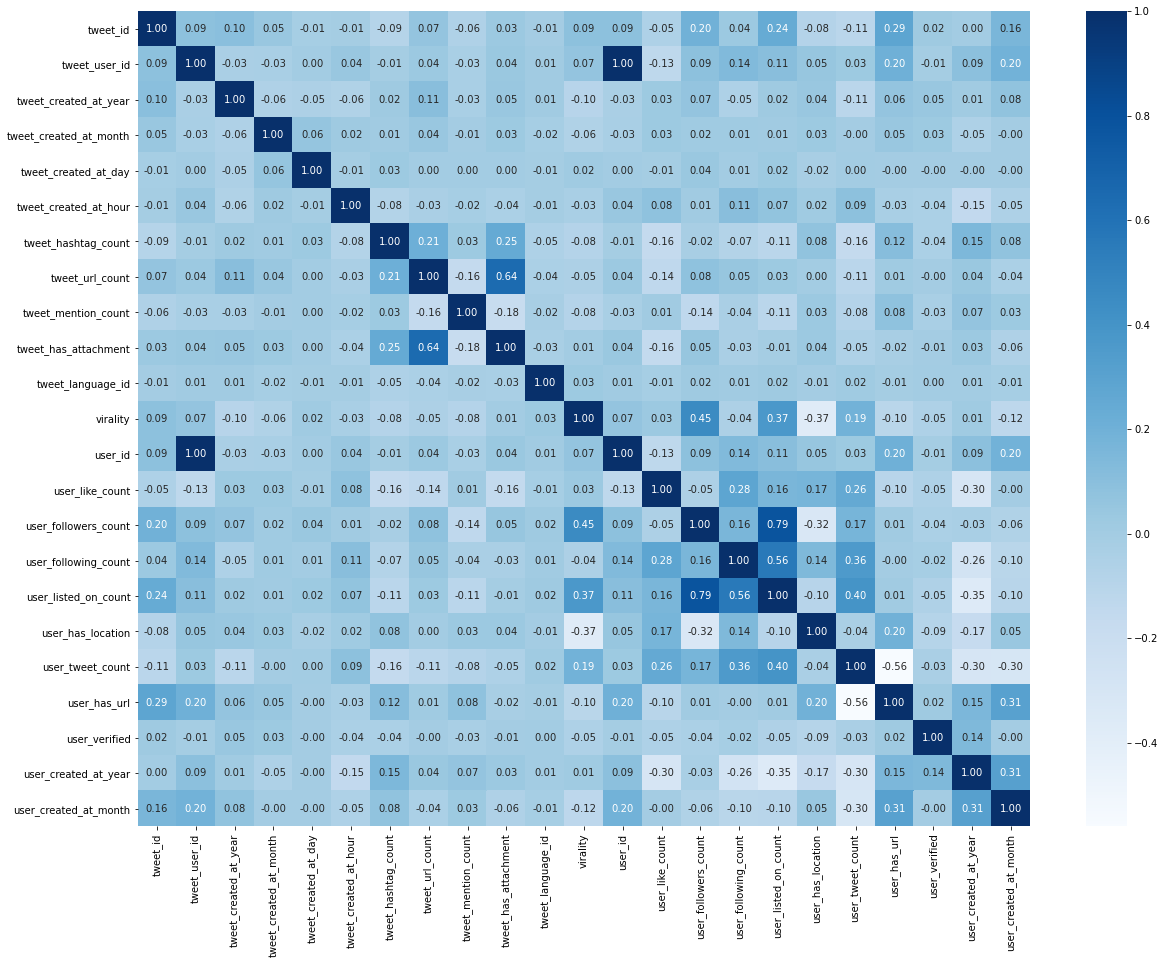

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(df_users.corr(), cmap='Blues', fmt='.2f', annot=True)

### Outliers

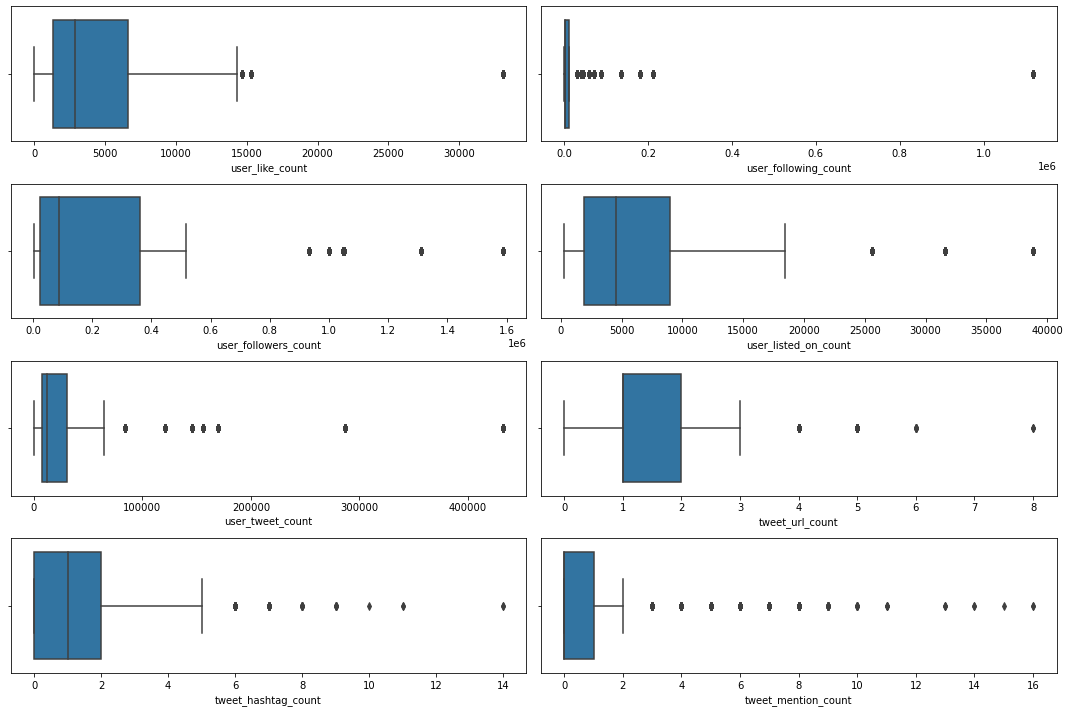

In [21]:
plt.figure(figsize=(15,10))
for i in range(0,len(['user_like_count','user_following_count','user_followers_count','user_listed_on_count','user_tweet_count','tweet_url_count','tweet_hashtag_count','tweet_mention_count'])):
    plt.subplot(4,2,i+1)
    sns.boxplot(df_users[['user_like_count','user_following_count','user_followers_count','user_listed_on_count','user_tweet_count','tweet_url_count','tweet_hashtag_count','tweet_mention_count'][i]], orient='h')
plt.tight_layout()

# Vectorized Data Processing

In [22]:
train_med = pd.read_csv('Dataset/Tweets/train_tweets_vectorized_media.csv')
test_med = pd.read_csv('Dataset/Tweets/test_tweets_vectorized_media.csv')

In [23]:
train_med.head()

media_id  tweet_id  img_feature_0  img_feature_1  img_feature_2  \
0  00001_00000         1       0.290614       0.150803       0.008313   
1  00004_00003         4       0.038251       0.036437       0.000000   
2  00005_00004         5       0.506981       0.305467       0.036150   
3  00008_00007         8       0.000000       0.242857       0.000000   
4  00009_00008         9       0.000000       0.141986       0.000000   

   img_feature_3  img_feature_4  img_feature_5  img_feature_6  img_feature_7  \
0       0.040887            0.0       0.000000       0.214209       0.000792   
1       0.015076            0.0       0.046953       0.648170       0.026476   
2       0.114539            0.0       0.146888       0.584753       0.157468   
3       0.068217            0.0       0.117847       0.000000       0.000000   
4       0.000983            0.0       0.013148       0.066999       0.008579   

   img_feature_8  img_feature_9  img_feature_10  img_feature_11  \
0        0.00027       0.424207        0.000000        0.372124   
1        0.00000       0.191951        0.003372        0.000000   
2        0.00000       0.040884        0.009688        0.000000   
3        0.00000       0.040679        0.027965        0.000000   
4        0.00000       0.132708        0.000013        0.000000   

   img_feature_12  img_feature_13  img_feature_14  img_feature_15  \
0        0.031332        0.041069        0.000000        0.209875   
1        0.009363        0.000000        0.000000        0.012317   
2        0.000000        0.000000        0.074692        0.018211   
3        0.001766        0.014541        0.000000        0.010728   
4        0.000000        0.000000        0.000000        0.001043   

   img_feature_16  img_feature_17  img_feature_18  img_feature_19  \
0        0.232068        0.003567        0.185193        0.096734   
1        0.016527        0.130308        0.000000        0.000000   
2        0.233618        0.039807        0.000000        0.000000   
3        0.147126        0.574918        0.000000        0.126482   
4        0.004207        0.455128        0.000000        0.200548   

   img_feature_20  img_feature_21  img_feature_22  img_feature_23  \
0        0.127461        0.005552        0.000435        0.429719   
1        0.303246        0.000000        0.307988        0.011478   
2        0.169830        0.000000        0.045755        0.028518   
3        0.096826        0.040340        0.005732        0.000296   
4        0.062265        0.000000        0.031603        0.000000   

   img_feature_24  img_feature_25  img_feature_26  img_feature_27  \
0        0.024739        0.000051        0.000842        0.115226   
1        0.044807        0.208410        0.043399        0.118079   
2        0.000000        0.259838        0.117726        0.017544   
3        0.000000        0.081848        0.000000        0.001031   
4        0.000000        0.176387        0.002721        0.014317   

   img_feature_28  img_feature_29  img_feature_30  img_feature_31  \
0        0.000000        0.026856        0.000000        0.031253   
1        0.000222        0.083115        0.000000        0.634716   
2        0.018106        0.000000        0.019969        0.257562   
3        0.114108        0.000000        0.000000        0.702560   
4        0.032541        0.000000        0.000000        1.168682   

   img_feature_32  img_feature_33  img_feature_34  img_feature_35  \
0        0.032772        0.051137        0.026097        0.962891   
1        0.000000        0.014040        0.090266        0.000000   
2        0.000000        0.006338        0.000000        0.000000   
3        0.000000        0.307037        0.290887        0.003196   
4        0.033444        0.214281        0.109845        0.000000   

   img_feature_36  img_feature_37  img_feature_38  img_feature_39  \
0        0.132004        0.158875        0.000000        0.038620   
1        0.127964        0.189758        0.113801      

In [24]:
print(train_med.shape, test_med.shape)

(21010, 2050) (8946, 2050)


In [25]:
df_med = train_med.append(test_med).reset_index(drop=True)

In [26]:
df_med.shape

(29956, 2050)

In [27]:
train_med[train_med['tweet_id'].duplicated()]

media_id  tweet_id  img_feature_0  img_feature_1  img_feature_2  \
23     00041_00035        41       0.002410       0.091483       0.046333   
24     00041_00036        41       0.189800       0.010744       0.122267   
40     00075_00058        75       0.050762       0.248446       0.186107   
41     00075_00059        75       0.041678       0.093292       0.175349   
42     00075_00060        75       0.001660       0.047169       0.172111   
...            ...       ...            ...            ...            ...   
20967  42231_29891     42231       0.372668       0.744152       0.790253   
20968  42231_29892     42231       0.007428       0.271974       0.003605   
20996  42277_29932     42277       0.290888       0.050881       0.534759   
20997  42277_29933     42277       0.177498       0.331633       0.001485   
20998  42277_29934     42277       0.141053       0.018113       0.002121   

       img_feature_3  img_feature_4  img_feature_5  img_feature_6  \
23          0.273440       0.000811       0.264319       0.012433   
24          0.000000       0.000000       0.035037       0.006045   
40          0.000000       0.000000       0.000698       0.091774   
41          0.000000       0.000000       0.276361       0.176262   
42          0.128043       0.006482       0.003700       0.043919   
...              ...            ...            ...            ...   
20967       0.077798       0.011904       0.038824       0.000000   
20968       0.191956       0.071498       0.000000       0.003331   
20996       0.000000       0.000000       0.102440       0.225570   
20997       0.245711       0.000000       0.347300       0.001812   
20998       0.395075       0.000000       0.052244       0.011805   

       img_feature_7  img_feature_8  img_feature_9  img_feature_10  \
23          0.081468       0.123094       0.114699        0.082601   
24          0.000000       0.000604       0.000081        0.206385   
40          0.438224       0.720446       0.054965        0.184776   
41          0.053829       0.220897       0.015978        0.104432   
42          0.913302       1.553766       0.004257        0.039866   
...              ...            ...            ...             ...   
20967       0.041523       0.171781       0.081026        0.000000   
20968       0.000000       0.012280       0.045288        0.012796   
20996       0.304052       0.000000       0.000000        0.000000   
20997       0.540876       0.361001       0.225808        0.141812   
20998       0.064066       0.273588       0.002169        0.052886   

       img_feature_11  img_feature_12  img_feature_13  img_feature_14  \
23           0.091520        0.009007        0.201936        0.034255   
24           0.004213        0.318885        0.394028        0.060590   
40           0.000000        0.000000        0.182378        0.001115   
41           0.001344        0.062607        0.122522        0.002598   
42           0.073821        0.053100        0.274316        0.126441   
...               ...             ...             ...             ...   
20967        0.030537        0.000000        0.000000        0.000000   
20968        0.013194        0.273588        0.011546        0.149420   
20996        0.164524        0.001024        0.035633        0.029530   
20997        0.379505        0.000367        0.230342        0.000000   
20998        0.000339        0.000000        0.001595        0.000000   

       img_feature_15  img_feature_16  img_feature_17  img_feature_18  \
23           0.388686        0.000000        0.046491        0.000000   
24           0.057512        0.000000        0.007802        0.000000   
40           0.097925        0.000000        0.198797        0.011729   
41           0.001345        0.130594        0.140032        0.000000   
42           0.098026        0.000000        0.387434        0.000000   
...               ...             ...             ...             ...   
20967        0.042524      

### Vectorized Pre-Processing

In [28]:
#new feature: number of media
df_med['total_media'] = df_med.groupby('tweet_id')['media_id'].transform('count')

In [29]:
#drop duplicate tweet id
df_med.drop_duplicates(subset='tweet_id', keep='first', inplace=True)
df_med.reset_index(drop=True, inplace=True)
df_med.shape

(24911, 2051)

In [30]:
df_med['tweet_id'].isnull().sum()

0

#### PCA

In [31]:
pca_x = df_med.drop(columns=['media_id','tweet_id','total_media'])
pca_y = df_med[['media_id','tweet_id','total_media']]
list_med = list(df_med.drop(columns=['media_id','tweet_id','total_media']))

In [32]:
pca_x.shape

(24911, 2048)

In [33]:
#std scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca_x_std = scaler.fit_transform(pca_x)

In [34]:
len(pca_x_std)

24911

In [35]:
#dataframe
pca_med = pd.DataFrame(data=pca_x_std, columns=list_med)
# pca_med.reset_index(inplace=True)
# pca_y.reset_index(inplace=True)
# pca_med = pca_y.merge(pca_med,
#                         on='index',
#                         how='left')
# pca_med['tweet_id'].isnull().sum()

In [36]:
pca_med.head()

img_feature_0  img_feature_1  img_feature_2  img_feature_3  img_feature_4  \
0       0.755384       0.147199      -0.586095      -0.449265      -0.463336   
1      -0.507270      -0.538144      -0.643984      -0.607207      -0.463336   
2       1.837937       1.074029      -0.392241       0.001427      -0.463336   
3      -0.698650       0.698833      -0.643984      -0.282024      -0.463336   
4      -0.698650       0.094364      -0.643984      -0.693445      -0.463336   

   img_feature_5  img_feature_6  img_feature_7  img_feature_8  img_feature_9  \
0      -0.665152       0.148088      -0.616670      -0.580715       1.093470   
1      -0.344786       2.201100      -0.423487      -0.582549       0.087268   
2       0.337079       1.901082       0.561760      -0.582549      -0.567200   
3       0.138932      -0.865304      -0.622625      -0.582549      -0.568088   
4      -0.575444      -0.548342      -0.558099      -0.582549      -0.169392   

   img_feature_10  img_feature_11  img_feature_12  img_feature_13  \
0       -0.722745        2.619687       -0.593702       -0.426292   
1       -0.704125       -0.506278       -0.713244       -0.690719   
2       -0.669253       -0.506278       -0.764191       -0.690719   
3       -0.568331       -0.506278       -0.754584       -0.597098   
4       -0.722673       -0.506278       -0.764191       -0.690719   

   img_feature_14  img_feature_15  img_feature_16  img_feature_17  \
0       -0.604221        0.721743        0.690080       -0.815593   
1       -0.604221       -0.582934       -0.603722       -0.258148   
2       -0.102714       -0.544007        0.699387       -0.656199   
3       -0.604221       -0.593425        0.180213        1.697371   
4       -0.604221       -0.657386       -0.677673        1.170502   

   img_feature_18  img_feature_19  img_feature_20  img_feature_21  \
0        0.379335       -0.312085       -0.334279       -0.656404   
1       -0.703849       -0.820811        0.522970       -0.690295   
2       -0.703849       -0.820811       -0.127660       -0.690295   
3       -0.703849       -0.155638       -0.483673       -0.444051   
4       -0.703849        0.233876       -0.652216       -0.690295   

   img_feature_22  img_feature_23  img_feature_24  img_feature_25  \
0       -0.740332        1.639378       -0.363320       -0.793126   
1        0.992340       -0.667677       -0.205208        0.426116   
2       -0.485014       -0.573685       -0.558231        0.727049   
3       -0.710495       -0.729359       -0.558231       -0.314481   
4       -0.564744       -0.730992       -0.558231        0.238730   

   img_feature_26  img_feature_27  img_feature_28  img_feature_29  \
0       -0.732095       -0.140455       -0.593073       -0.621749   
1       -0.460826       -0.125796       -0.591548       -0.305912   
2        0.012944       -0.642326       -0.468903       -0.772521   
3       -0.737459       -0.727166        0.189491       -0.772521   
4       -0.720117       -0.658907       -0.369902       -0.772521   

   img_feature_30  img_feature_31  img_feature_32  img_feature_33  \
0       -0.609549       -0.805776       -0.511389       -0.489585   
1       -0.609549        1.326300       -0.685417       -0.688364   
2       -0.488039       -0.006210       -0.685417       -0.729636   
3       -0.609549        1.565997       -0.685417        0.881603   
4       -0.609549        3.212836       -0.507820        0.384589   

   img_feature_34  img_feature_35  img_feature_36  img_feature_37  \
0       -0.724464        5.512000       -0.128105       -0.126138   
1       -0.419388       -0.638794       -0.147094        0.017284   
2       -0.848539       -0.638794       -0.321012        2.601461   
3        0.534421       -0.618379       -0.307484        0.331355   
4       -0.326307       -0.638794       -0.420002       -0.819284   

   img_feature_38  img_feature_39  img_feature_40  img_feature_41  \
0       -0.633986       -0.473009       -0.553195       -0.606611  

In [37]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pcs = pca.fit_transform(pca_x_std)


pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20'])
pdf.reset_index(inplace=True)
pca_y.reset_index(inplace=True)
pdf = pca_y.merge(pdf,on='index',how='left')

In [38]:
pdf.drop(columns=['index','media_id'], axis=1, inplace=True)

In [39]:
pdf

,tweet_id,total_media,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20
0,1,1,-2.208785,-4.717515,8.017019,2.652987,-4.244704,11.047195,-5.187243,1.321496,4.492324,3.112523,-8.781137,-3.594917,-1.024122,-0.575530,-1.123057,-0.155369,-1.719135,8.215490,3.473536,-1.807712
1,4,1,-22.062361,6.451763,4.587213,-0.390560,-2.499681,-1.276114,-1.753964,1.027180,-1.175908,0.533271,-2.952206,-2.188348,0.617287,-0.590093,-1.434866,-0.694462,0.686340,-2.250686,0.656957,1.431854
2,5,1,-18.849404,9.084850,3.816836,1.568821,-2.583577,-4.884359,2.004185,9.193651,7.344628,-6.977632,-2.517894,-2.491055,1.296961,-2.218775,-0.275274,-1.301190,1.213651,-1.606102,1.518565,3.124455
3,8,1,-15.057349,-10.949959,13.140780,-2.357086,7.324525,-2.848208,-1.066955,1.029750,-1.052549,-4.031730,3.126093,2.291812,-2.481802,9.223802,-1.763090,-0.275301,0.109425,-0.401925,-1.463974,-1.848437
4,9,1,-15.742891,-10.898119,13.210592,-5.501077,5.502188,-6.304484,-3.018174,4.421175,-2.500469,-2.792044,3.754341,0.449620,-2.810262,8.315713,1.099715,-2.636843,0.782382,2.060887,-0.588041,0.957001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24906,42283,4,-1.294848,3.569754,-5.763124,3.032199,0.887931,0.043620,-4.748680,-4.270175,5.580361,1.113586,7.583592,0.738695,-3.185351,-0.096728,4.914252,-6.404698,-0.615050,-3.822469,-3.707369,1.066346
24907,42295,1,-15.337985,7.077502,4.970794,-3.045202,1.268111,-7.387049,-3.454307,-2.742489,8.689023,1.271008,0.199819,-2.031207,-4.650680,2.197132,-0.439816,-6.014176,2.184211,-2.318284,2.088354,2.434066
24908,42301,1,8.820149,7.099960,-4.528563,3.568461,0.549384,-0.178404,-5.229461,-5.073351,4.295246,4.550586,8.446898,-1.368976,-9.565259,-1.836149,5.352920,-4.023537,-4.018341,-1.474595,-1.844114,8.121880
24909,42313,1,-6.384686,2.286027,-4.323208,-2.731774,-0.134714,2.067948,2.778919,-5.214817,-1.138301,-1.651065,2.514311,-3.873486,-1.414120,3.755025,-3.393123,-0.708107,1.128287,-3.111542,-0.892578,-3.216174


### Skree Plot

In [40]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [91.85764776 47.72937313 43.40535832 32.99447389 27.85618083 26.56838688
 24.73496359 22.72419115 21.96020742 20.09961937 19.49763273 19.1127513
 17.3186446  17.09120073 16.46337021 16.31696593 15.4990948  14.8797106
 13.85523872 13.57674551]
Explained variance ratio: [0.04485057 0.02330442 0.02119317 0.01610994 0.0136011  0.01297232
 0.01207713 0.01109535 0.01072233 0.00981387 0.00951995 0.00933202
 0.00845603 0.00834498 0.00803843 0.00796695 0.00756761 0.00726519
 0.00676498 0.006629  ]


<BarContainer object of 20 artists>

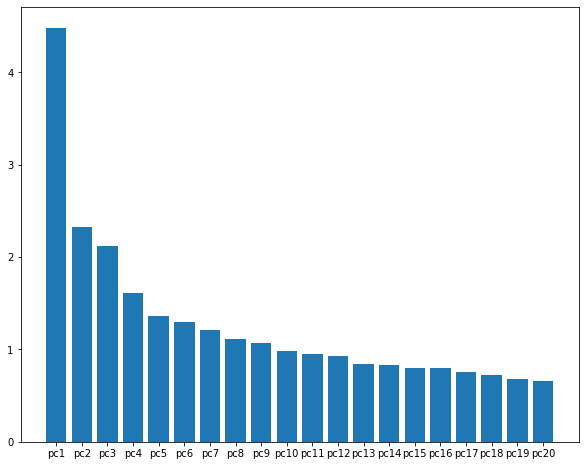

In [41]:
plt.figure(figsize=(10,8))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20'], pca.explained_variance_ratio_ * 100)

# Data Pre-Processing

In [42]:
df_pre = df_users.copy()

In [43]:
df_pre[cats].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42322 entries, 0 to 42321
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   tweet_has_attachment    42322 non-null  bool  
 1   tweet_attachment_class  42322 non-null  object
 2   tweet_topic_ids         36235 non-null  object
 3   user_has_location       42322 non-null  bool  
 4   user_has_url            42322 non-null  bool  
dtypes: bool(3), object(2)
memory usage: 2.3+ MB


### Feature Engineering

In [44]:
df_pre.head()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids,virality,user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month
0,34698,10,2015,12,5,3,2.0,1.0,0.0,False,C,0,"['36', '36', '36', '36', '36', '36', '37', '37...",3.0,10,9365,398591,136081,18462,True,169980,True,0,2011,10
1,24644,4,2020,6,19,0,0.0,1.0,0.0,False,C,0,"['43', '78', '79', '80', '80', '89', '98', '99...",3.0,4,15311,459083,1021,7368,False,121193,False,0,2011,6
2,36321,54,2019,6,2,15,2.0,3.0,0.0,True,A,0,"['79', '80', '98', '98', '98', '99', '99', '10...",1.0,54,336,447110,584,10519,True,3786,True,0,2011,12
3,2629,42,2020,9,6,17,0.0,1.0,1.0,True,A,0,"['43', '79', '80', '98', '99', '99', '79', '80']",2.0,42,1124,276541,758,6163,True,3264,True,0,2011,9
4,28169,32,2020,11,4,17,2.0,1.0,0.0,True,A,0,"['79', '80', '98', '99', '43', '89']",2.0,32,0,1587783,2,16414,False,2022,True,0,2013,7


In [45]:
df_pre = df_pre.assign(tweet_topic_ids=df_pre['tweet_topic_ids'].str.split(',')).explode('tweet_topic_ids')

In [46]:
df_pre['tweet_topic_ids'] = df_pre['tweet_topic_ids'].str.replace(r'\D','')

In [47]:
df_pre.drop_duplicates(inplace=True)

In [48]:
df_pre.shape

(174674, 25)

In [49]:
#df_group
df_grouped = df_pre.groupby('tweet_id').agg('mean').reset_index()
df_grouped

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_language_id,virality,user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month
0,0,8,2021,1,23,19,0.0,0.0,0.0,True,0,1.0,8,7776,168167,11290,1816,True,7065,True,0,2013,4
1,1,8,2021,1,22,19,1.0,1.0,0.0,True,0,1.0,8,7776,168167,11290,1816,True,7065,True,0,2013,4
2,2,8,2021,1,20,0,0.0,1.0,1.0,True,0,NaN,8,7776,168167,11290,1816,True,7065,True,0,2013,4
3,3,8,2021,1,18,17,1.0,1.0,0.0,True,0,NaN,8,7776,168167,11290,1816,True,7065,True,0,2013,4
4,4,8,2021,1,16,20,2.0,2.0,1.0,True,0,2.0,8,7776,168167,11290,1816,True,7065,True,0,2013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42317,42319,0,2019,9,18,15,0.0,1.0,0.0,False,0,NaN,0,1164,48720,70469,5956,True,14122,True,0,2010,8
42318,42320,0,2019,9,18,15,0.0,2.0,0.0,True,0,NaN,0,1164,48720,70469,5956,True,14122,True,0,2010,8
42319,42321,0,2019,9,18,15,1.0,1.0,0.0,False,0,1.0,0,1164,48720,70469,5956,True,14122,True,0,2010,8
42320,42322,0,2019,9,18,14,1.0,1.0,0.0,False,0,NaN,0,1164,48720,70469,5956,True,14122,True,0,2010,8


In [50]:
#topic ids data
dummies_category = pd.get_dummies(df_pre['tweet_topic_ids'],prefix='tweet_topic_ids', dummy_na=True)
dummies_category['tweet_id'] = df_pre['tweet_id']
dummies_grouped = dummies_category.groupby('tweet_id').sum().reset_index()
dummies_grouped.drop(columns='tweet_id', axis=1, inplace=True)

In [51]:
#append
df_topic = pd.concat([df_grouped,dummies_grouped], axis=1)
df_topic

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_language_id,virality,user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month,tweet_topic_ids_100,tweet_topic_ids_101,tweet_topic_ids_104,tweet_topic_ids_111,tweet_topic_ids_112,tweet_topic_ids_117,tweet_topic_ids_118,tweet_topic_ids_119,tweet_topic_ids_120,tweet_topic_ids_121,tweet_topic_ids_122,tweet_topic_ids_123,tweet_topic_ids_125,tweet_topic_ids_126,tweet_topic_ids_127,tweet_topic_ids_147,tweet_topic_ids_148,tweet_topic_ids_149,tweet_topic_ids_150,tweet_topic_ids_151,tweet_topic_ids_152,tweet_topic_ids_153,tweet_topic_ids_155,tweet_topic_ids_156,tweet_topic_ids_163,tweet_topic_ids_165,tweet_topic_ids_169,tweet_topic_ids_170,tweet_topic_ids_171,tweet_topic_ids_172,tweet_topic_ids_36,tweet_topic_ids_37,tweet_topic_ids_38,tweet_topic_ids_39,tweet_topic_ids_43,tweet_topic_ids_44,tweet_topic_ids_45,tweet_topic_ids_52,tweet_topic_ids_58,tweet_topic_ids_59,tweet_topic_ids_60,tweet_topic_ids_61,tweet_topic_ids_63,tweet_topic_ids_68,tweet_topic_ids_71,tweet_topic_ids_72,tweet_topic_ids_73,tweet_topic_ids_78,tweet_topic_ids_79,tweet_topic_ids_80,tweet_topic_ids_81,tweet_topic_ids_82,tweet_topic_ids_87,tweet_topic_ids_88,tweet_topic_ids_89,tweet_topic_ids_91,tweet_topic_ids_93,tweet_topic_ids_98,tweet_topic_ids_99,tweet_topic_ids_nan
0,0,8,2021,1,23,19,0.0,0.0,0.0,True,0,1.0,8,7776,168167,11290,1816,True,7065,True,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
1,1,8,2021,1,22,19,1.0,1.0,0.0,True,0,1.0,8,7776,168167,11290,1816,True,7065,True,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
2,2,8,2021,1,20,0,0.0,1.0,1.0,True,0,NaN,8,7776,168167,11290,1816,True,7065,True,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,3,8,2021,1,18,17,1.0,1.0,0.0,True,0,NaN,8,7776,168167,11290,1816,True,7065,True,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0
4,4,8,2021,1,16,20,2.0,2.0,1.0,True,0,2.0,8,7776,168167,11290,1816,True,7065,True,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42317,42319,0,2019,9,18,15,0.0,1.0,0.0,False,0,NaN,0,1164,48720,70469,5956,True,14122,True,0,2010,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0
42318,42320,0,2019,9,18,15,0.0,2.0,0.0,True,0,NaN,0,1164,48720,70469,5956,True,14122,True,0,2010,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0
42319,42321,0,2019,9,18,15,1.0,1.0,0.0,False,0,1.0,0,1164,48720,70469,5956,True,14122,True,0,2010,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0
42320,42322,0,2019,9,18,14,1.0,1.0,0.0,False,0,NaN,0,1164,48720,70469,5956,True,14122,True,0,2010,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0


In [52]:
df_cats = df_users[['tweet_attachment_class','tweet_id']]
df_topic = df_topic.merge(df_cats,
               how='left',
               on='tweet_id')

In [53]:
# #add total media
# df_topic = df_topic.merge(pca_y, how='left',on='tweet_id')
# df_topic.drop(columns=['index','media_id'], axis=1, inplace=True)
# # df_topic['total_media'] = np.where(df_topic['total_media'].isnull(), 0, df_topic['total_media'])

In [54]:
#new columns: like to followers percentage
df_topic['like_to_followers_perc'] = df_topic['user_like_count'] / df_topic['user_followers_count']

In [55]:
#new columns: following per followers percentage
df_topic['foll_perc'] = df_topic['user_following_count'] / df_topic['user_followers_count']

In [56]:
# #new columns: how many likes user get per tweet
# df_topic['like_per_tweet'] = df_topic['user_like_count'] / df_topic['user_tweet_count']

In [57]:
# #new columns: like to followings percentage
# df_topic['like_to_followings_perc'] = df_topic['user_like_count'] / df_topic['user_following_count']
# df_topic['like_to_followings_perc'] = np.where(df_topic['like_to_followings_perc'].isnull(), 0, df_topic['like_to_followings_perc'])

In [58]:
# #new columns: user to tweet creation time
# df_topic['user_to_tweet_year'] = df_topic['tweet_created_at_year'] - df_topic['user_created_at_year']

In [59]:
# #new columns: tweet creation time indicator
# df_topic['time_indicator_tweet'] = np.where(df_topic['tweet_created_at_hour'].isin([0,1,2,3]), 'Midnight',
#                                             np.where(df_topic['tweet_created_at_hour'].isin([4,5,6]), 'Dawn',
#                                                      np.where(df_topic['tweet_created_at_hour'].isin([7,8,9,10,11]), 'Morning',
#                                                               np.where(df_topic['tweet_created_at_hour'].isin([12,13,14,15,16]), 'Afternoon',
#                                                                        np.where(df_topic['tweet_created_at_hour'].isin([17,18,19]), 'Evening', 'Night')))))

### Normalization

In [60]:
for var in ['user_like_count','user_following_count','user_followers_count','user_listed_on_count','user_tweet_count','tweet_url_count','tweet_hashtag_count','tweet_mention_count']:
    df_topic[var] = (df_topic[var]+1).apply(np.log)
    
from sklearn.preprocessing import MinMaxScaler
for var in ['user_like_count','user_following_count','user_followers_count','user_listed_on_count','user_tweet_count','tweet_url_count','tweet_hashtag_count','tweet_mention_count']:
    df_topic[var] = MinMaxScaler().fit_transform(df_topic[var].values.reshape(len(df_topic),1))

In [61]:
# for var in ['user_like_count','user_following_count','user_followers_count','user_listed_on_count','user_tweet_count']:
#     df_topic[var] = (df_topic[var]+1).apply(np.log)
    
# from sklearn.preprocessing import MinMaxScaler
# for var in ['user_like_count','user_following_count','user_followers_count','user_listed_on_count','user_tweet_count']:
#     df_topic[var] = MinMaxScaler().fit_transform(df_topic[var].values.reshape(len(df_topic),1))

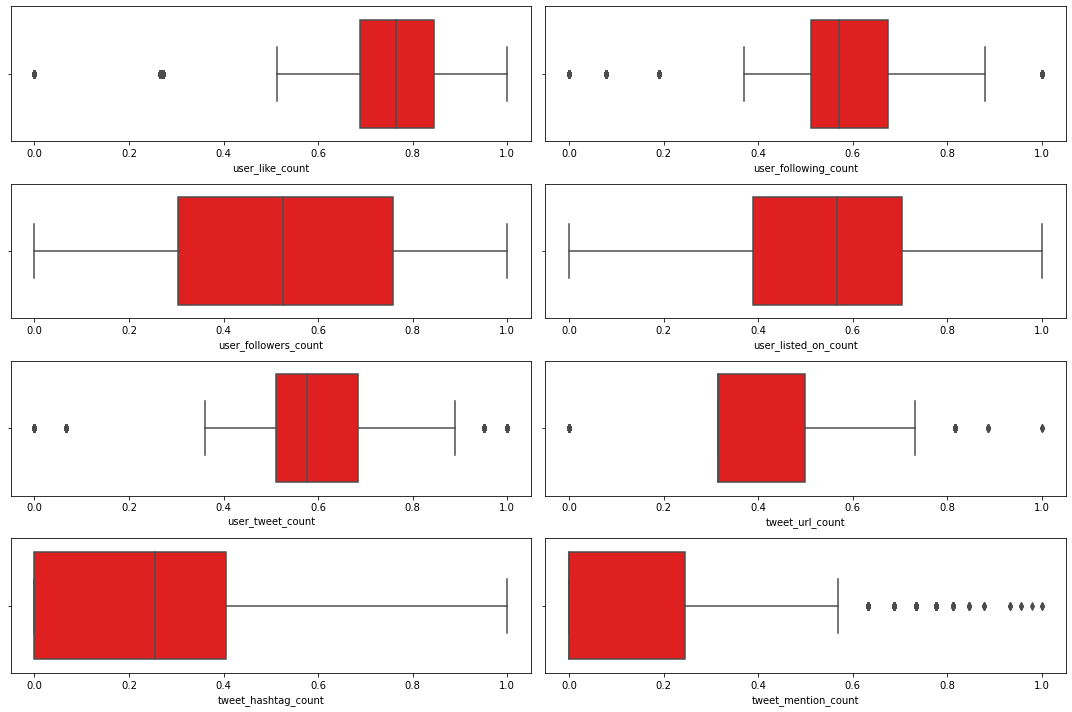

In [62]:
plt.figure(figsize=(15,10))
for i in range(0,len(['user_like_count','user_following_count','user_followers_count','user_listed_on_count','user_tweet_count','tweet_url_count','tweet_hashtag_count','tweet_mention_count'])):
    plt.subplot(4,2,i+1)
    sns.boxplot(df_topic[['user_like_count','user_following_count','user_followers_count','user_listed_on_count','user_tweet_count','tweet_url_count','tweet_hashtag_count','tweet_mention_count'][i]], orient='h', color='red')
plt.tight_layout()

In [63]:
# print(f'Data before filtering outliers: {len(df_topic)}')

# filtered_entries = np.array([True] * len(df_topic))
# for col in ['tweet_mention_count','user_like_count','user_tweet_count','tweet_url_count','user_following_count']:
#     Q1 = df_topic[col].quantile(0.25)
#     Q3 = df_topic[col].quantile(0.75)
#     IQR = Q3 - Q1
#     low_limit = Q1 - (IQR * 1.5)
#     high_limit = Q3 + (IQR * 1.5)

#     filtered_entries = ((df_topic[col] >= low_limit) & (df_topic[col] <= high_limit)) & filtered_entries
    
# df_iqr = df_topic[filtered_entries]

# print(f'Jumlah baris setelah memfilter outlier: {len(df_iqr)}')

In [64]:
# df_iqr[df_iqr['virality'].isnull()]

In [65]:
# for var in ['like_to_followers_perc','foll_perc']:
#     df_topic[var] = (df_topic[var]+1).apply(np.log)
    
# from sklearn.preprocessing import MinMaxScaler
# for var in ['like_to_followers_perc','foll_perc']:
#     df_topic[var] = MinMaxScaler().fit_transform(df_topic[var].values.reshape(len(df_topic),1))

### Categorical Encoding

In [66]:
dummies_category = pd.get_dummies(df_topic['tweet_attachment_class'], prefix='attachment_class')
df_topic = pd.concat([df_topic,dummies_category], axis=1)
df_topic.drop(columns='tweet_attachment_class', axis=1,inplace=True)

In [67]:
dummies_category = pd.get_dummies(df_topic['tweet_has_attachment'], prefix='attachment')
df_topic = pd.concat([df_topic,dummies_category], axis=1)
df_topic.drop(columns='tweet_has_attachment', axis=1,inplace=True)

In [68]:
dummies_category = pd.get_dummies(df_topic['user_has_location'], prefix='location')
df_topic = pd.concat([df_topic,dummies_category], axis=1)
df_topic.drop(columns='user_has_location', axis=1,inplace=True)

In [69]:
dummies_category = pd.get_dummies(df_topic['user_has_url'], prefix='url')
df_topic = pd.concat([df_topic,dummies_category], axis=1)
df_topic.drop(columns='user_has_url', axis=1,inplace=True)

In [463]:
# dummies_category = pd.get_dummies(df_topic['total_media'], prefix='number_of_media', dummy_na=True)
# df_topic = pd.concat([df_topic,dummies_category], axis=1)
# df_topic.drop(columns='total_media', axis=1,inplace=True)

In [464]:
# dummies_category = pd.get_dummies(df_topic['time_indicator_tweet'], prefix='time_indicator')
# df_topic = pd.concat([df_topic,dummies_category], axis=1)
# df_topic.drop(columns='time_indicator_tweet', axis=1,inplace=True)

In [522]:
# #IQR
# dummies_category = pd.get_dummies(df_iqr['tweet_attachment_class'], prefix='attachment_class')
# df_iqr = pd.concat([df_iqr,dummies_category], axis=1)
# df_iqr.drop(columns='tweet_attachment_class', axis=1,inplace=True)

# dummies_category = pd.get_dummies(df_iqr['tweet_has_attachment'], prefix='attachment')
# df_iqr = pd.concat([df_iqr,dummies_category], axis=1)
# df_iqr.drop(columns='tweet_has_attachment', axis=1,inplace=True)

# dummies_category = pd.get_dummies(df_iqr['user_has_location'], prefix='location')
# df_iqr = pd.concat([df_iqr,dummies_category], axis=1)
# df_iqr.drop(columns='user_has_location', axis=1,inplace=True)

# dummies_category = pd.get_dummies(df_iqr['user_has_url'], prefix='url')
# df_iqr = pd.concat([df_iqr,dummies_category], axis=1)
# df_iqr.drop(columns='user_has_url', axis=1,inplace=True)

# # dummies_category = pd.get_dummies(df_iqr['total_media'], prefix='number_of_media', dummy_na=True)
# # df_iqr = pd.concat([df_iqr,dummies_category], axis=1)
# # df_iqr.drop(columns='total_media', axis=1,inplace=True)

# Modelling


In [42]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as ltb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [1466]:
df_train = df_topic[df_topic['virality'].notnull()]
df_test = df_topic[df_topic['virality'].isnull()]

In [1467]:
print(df_train.shape, df_test.shape)

(29625, 91) (12697, 91)


In [1468]:
X = df_train.drop(columns=['tweet_id','tweet_user_id','virality'], axis=1)
y = df_train['virality']

In [1469]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=42)

## Modelling PCA Prep

In [358]:
df_vector = df_topic.merge(pdf, on='tweet_id', how='left')
df_vector['total_media'] = np.where(df_vector['total_media'].isnull(), 0, df_vector['total_media'])
df_vector.head()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_language_id,virality,user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_tweet_count,user_verified,user_created_at_year,user_created_at_month,tweet_topic_ids_100,tweet_topic_ids_101,tweet_topic_ids_104,tweet_topic_ids_111,tweet_topic_ids_112,tweet_topic_ids_117,tweet_topic_ids_118,tweet_topic_ids_119,tweet_topic_ids_120,tweet_topic_ids_121,tweet_topic_ids_122,tweet_topic_ids_123,tweet_topic_ids_125,tweet_topic_ids_126,tweet_topic_ids_127,tweet_topic_ids_147,tweet_topic_ids_148,tweet_topic_ids_149,tweet_topic_ids_150,tweet_topic_ids_151,tweet_topic_ids_152,tweet_topic_ids_153,tweet_topic_ids_155,tweet_topic_ids_156,tweet_topic_ids_163,tweet_topic_ids_165,tweet_topic_ids_169,tweet_topic_ids_170,tweet_topic_ids_171,tweet_topic_ids_172,tweet_topic_ids_36,tweet_topic_ids_37,tweet_topic_ids_38,tweet_topic_ids_39,tweet_topic_ids_43,tweet_topic_ids_44,tweet_topic_ids_45,tweet_topic_ids_52,tweet_topic_ids_58,tweet_topic_ids_59,tweet_topic_ids_60,tweet_topic_ids_61,tweet_topic_ids_63,tweet_topic_ids_68,tweet_topic_ids_71,tweet_topic_ids_72,tweet_topic_ids_73,tweet_topic_ids_78,tweet_topic_ids_79,tweet_topic_ids_80,tweet_topic_ids_81,tweet_topic_ids_82,tweet_topic_ids_87,tweet_topic_ids_88,tweet_topic_ids_89,tweet_topic_ids_91,tweet_topic_ids_93,tweet_topic_ids_98,tweet_topic_ids_99,tweet_topic_ids_nan,like_to_followers_perc,foll_perc,attachment_class_A,attachment_class_B,attachment_class_C,attachment_False,attachment_True,location_False,location_True,url_False,url_True,total_media,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20
0,0,8,2021,1,23,19,0.000000,0.000000,0.000000,0,1.0,8,0.860852,0.630737,0.670039,0.38051,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0.04624,0.067136,0,1,0,0,1,0,1,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,8,2021,1,22,19,0.255958,0.315465,0.000000,0,1.0,8,0.860852,0.630737,0.670039,0.38051,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0.04624,0.067136,1,0,0,0,1,0,1,0,1,1.0,-2.208784,-4.717545,8.016996,2.653259,-4.241750,11.040664,-5.192236,1.333607,4.530871,3.133021,-8.832260,-3.626331,-1.223926,-0.822166,-1.166094,-0.273421,-1.572112,8.107740,3.987645,-0.958626
2,2,8,2021,1,20,0,0.000000,0.315465,0.244651,0,NaN,8,0.860852,0.630737,0.670039,0.38051,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0.04624,0.067136,1,0,0,0,1,0,1,0,1,1.0,-17.557789,-3.427001,-4.823180,1.595040,0.053393,4.417996,0.504536,4.621247,0.708141,-0.527026,-2.171785,-2.049581,-2.003046,-5.214701,-2.573082,5.557846,-2.427688,-2.452015,-4.270187,-1.262768
3,3,8,2021,1,18,17,0.255958,0.315465,0.000000,0,NaN,8,0.860852,0.630737,0.670039,0.38051,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0.04624,0.067136,1,0,0,0,1,0,1,0,1,1.0,-0.509952,-3.006149,16.984197,-1.028249,2.568079,17.415902,0.011171,-0.679730,4.569211,8.508322,-2.425919,-0.338582,-0.642046,-7.325194,-1.245262,-0.840948,0.326674,0.986512,-0.658651,-1.177960
4,4,8,2021,1,16,20,0.405684,0.500000,0.244651,0,2.0,8,0.860852,0.630737,0.670039,0.38051,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0.04624,0.067136,1,0,0,0,1,0,1,0,1,1.0,-22.062361,6.451728,4.587204,-0.390702,-2.498413,-1.275335,-1.757414,1.033548,-1.173324,0.538370,-2.954545,-2.169487,0.551272,-0.712848,-1.473037,-0.551924,0.732373,-2.614851,0.781599,1.321414


In [359]:
for var in ['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20']:
    df_vector[var] = np.where(df_vector[var].isnull(), 0, df_vector[var])

In [360]:
train_pca = df_vector[df_vector['virality'].notnull()]
test_pca = df_vector[df_vector['virality'].isnull()]

In [361]:
#training data
X_pca = train_pca.drop(columns=['tweet_id','tweet_user_id','virality'], axis=1)
y_pca = train_pca['virality']

In [362]:
Xtrain_pca, Xtest_pca, ytrain_pca, ytest_pca = train_test_split(X_pca,y_pca,test_size=0.3,random_state=42)

### Decision Tree

In [1449]:
#fitting model
dt = DecisionTreeClassifier(random_state=66)
dt.fit(Xtrain,ytrain)

#predict
y_pred = dt.predict(Xtest)

In [1450]:
accuracy_score(ytest,y_pred)

0.5834833483348335

In [1404]:
print('Train Accuracy Score :',dt.score(Xtrain,ytrain))
print('Test Accuracy Score :', dt.score(Xtest,ytest))

Train Accuracy Score : 0.9946954718618893
Test Accuracy Score : 0.5898964896489649


In [1405]:
#hyperparams
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter =['best']


hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=66, scoring='accuracy')
dt_tuned.fit(Xtrain, ytrain)

# Predict & Evaluation
y_pred = dt_tuned.predict(Xtest)#Check performa dari model
accuracy_score(ytest,y_pred)

0.6379387938793879

In [1382]:
print('Train Accuracy Score :',dt_tuned.score(Xtrain,ytrain))
print('Test Accuracy Score :', dt_tuned.score(Xtest,ytest))

Train Accuracy Score : 0.6736268505569755
Test Accuracy Score : 0.6414266426642664


**PCA MODEL**

In [363]:
#fitting model
dt = DecisionTreeClassifier()
dt.fit(Xtrain_pca,ytrain_pca)

#predict
y_pred = dt.predict(Xtest_pca)
accuracy_score(ytest_pca,y_pred)

0.5734698469846985

In [365]:
print('Train Accuracy Score :',dt.score(Xtrain_pca,ytrain_pca))
print('Test Accuracy Score :', dt.score(Xtest_pca,ytest_pca))

Train Accuracy Score : 0.9967690601340599
Test Accuracy Score : 0.5734698469846985


### Gaussian Naive Bayes

In [650]:
#fitting
nb = GaussianNB()
nb.fit(Xtrain,ytrain)

#predict
y_pred = nb.predict(Xtest)
accuracy_score(ytest, y_pred)

0.12297479747974797

In [559]:
print('Train Accuracy Score :',nb.score(Xtrain,ytrain))
print('Test Accuracy Score :', nb.score(Xtest,ytest))

Train Accuracy Score : 0.1302985002652264
Test Accuracy Score : 0.12252475247524752


### Random Forest

In [1408]:
#fitting
rf = RandomForestClassifier()
rf.fit(Xtrain,ytrain)

#predict
y_pred = rf.predict(Xtest)
accuracy_score(ytest,y_pred)

0.6705670567056705

In [1407]:
print('Train Accuracy Score :',rf.score(Xtrain,ytrain))
print('Test Accuracy Score :', rf.score(Xtest,ytest))

Train Accuracy Score : 0.9946472488788156
Test Accuracy Score : 0.6695544554455446


In [698]:
#hyperparams
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter =['best']


hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
rf_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=10, scoring='accuracy')
rf_tuned.fit(Xtrain, ytrain)

# Predict & Evaluation
y_pred = rf_tuned.predict(Xtest)#Check performa dari model
accuracy_score(ytest,y_pred)

0.6477272727272727

In [696]:
print('Train Accuracy Score :',rf_tuned.score(Xtrain,ytrain))
print('Test Accuracy Score :', rf_tuned.score(Xtest,ytest))

Train Accuracy Score : 0.6613782128562473
Test Accuracy Score : 0.6477272727272727


In [699]:
print('Best max_depth:', rf_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', rf_tuned.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', rf_tuned.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', rf_tuned.best_estimator_.get_params()['max_features'])
print('Best criterion:', rf_tuned.best_estimator_.get_params()['criterion'])

Best max_depth: 98
Best min_samples_split: 5
Best min_samples_leaf: 20
Best max_features: sqrt
Best criterion: gini


### LightGBM

In [1624]:
#fitting
# lgbm = ltb.LGBMClassifier(objective='multiclass',num_leaves=36, max_depth=16, n_estimators=109, learning_rate=0.1) #0.6760
# lgbm = ltb.LGBMClassifier(objective='multiclass',num_leaves=42, max_depth=14, n_estimators=210, learning_rate=0.05) #0.6766
# lgbm = ltb.LGBMClassifier(objective='multiclass',num_leaves=42, max_depth=18, n_estimators=210, learning_rate=0.05) #0.6772
lgbm = ltb.LGBMClassifier(objective='multiclass',num_leaves=42, max_depth=17, n_estimators=205, learning_rate=0.05) #0.6781
# lgbm = ltb.LGBMClassifier()
lgbm.fit(Xtrain,ytrain)

#predict
y_pred = lgbm.predict(Xtest)
accuracy_score(ytest,y_pred)

0.678105310531053

In [1625]:
print('Train Accuracy Score :',lgbm.score(Xtrain,ytrain))
print('Test Accuracy Score :', lgbm.score(Xtest,ytest))

Train Accuracy Score : 0.783478805998939
Test Accuracy Score : 0.678105310531053


In [419]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

**PCA MODEL**

In [369]:
#fitting
lgbm = ltb.LGBMClassifier()
lgbm.fit(Xtrain_pca,ytrain_pca)

#predict
y_pred = lgbm.predict(Xtest_pca)
accuracy_score(ytest_pca,y_pred)

0.6706795679567957

In [370]:
print('Train Accuracy Score :',lgbm.score(Xtrain_pca,ytrain_pca))
print('Test Accuracy Score :', lgbm.score(Xtest_pca,ytest_pca))

Train Accuracy Score : 0.807156290688142
Test Accuracy Score : 0.6706795679567957


### SGDClassifier

In [138]:
#fitting
sgdc = SGDClassifier()
sgdc.fit(Xtrain,ytrain)

#predict
y_pred = sgdc.predict(Xtest)
accuracy_score(ytest,y_pred)

0.2635013501350135

In [432]:
print('Train Accuracy Score :',sgdc.score(Xtrain,ytrain))
print('Test Accuracy Score :', sgdc.score(Xtest,ytest))

Train Accuracy Score : 0.4809278101943386
Test Accuracy Score : 0.4798604860486049


### CatBoost

In [486]:
#fitting
cb = CatBoostClassifier(learning_rate=0.1)
cb.fit(Xtrain,ytrain)

#predict
y_pred = cb.predict(Xtest)
accuracy_score(ytest,y_pred)

0:	learn: 1.4802781	total: 27.6ms	remaining: 27.6s
1:	learn: 1.3904634	total: 54.3ms	remaining: 27.1s
2:	learn: 1.3127381	total: 82.7ms	remaining: 27.5s
3:	learn: 1.2559133	total: 113ms	remaining: 28.2s
4:	learn: 1.2099090	total: 144ms	remaining: 28.7s
5:	learn: 1.1687041	total: 174ms	remaining: 28.9s
6:	learn: 1.1359374	total: 201ms	remaining: 28.5s
7:	learn: 1.1057001	total: 227ms	remaining: 28.1s
8:	learn: 1.0807940	total: 256ms	remaining: 28.2s
9:	learn: 1.0592588	total: 289ms	remaining: 28.6s
10:	learn: 1.0427725	total: 316ms	remaining: 28.4s
11:	learn: 1.0266972	total: 342ms	remaining: 28.2s
12:	learn: 1.0144467	total: 366ms	remaining: 27.8s
13:	learn: 1.0028723	total: 389ms	remaining: 27.4s
14:	learn: 0.9902897	total: 418ms	remaining: 27.5s
15:	learn: 0.9787792	total: 449ms	remaining: 27.6s
16:	learn: 0.9702440	total: 482ms	remaining: 27.9s
17:	learn: 0.9617255	total: 511ms	remaining: 27.9s
18:	learn: 0.9535324	total: 537ms	remaining: 27.7s
19:	learn: 0.9467811	total: 561ms	rema

0.6732673267326733

### XGBoost

In [674]:
#fitting
xg = XGBClassifier(eval_metric='logloss')
xg.fit(Xtrain,ytrain)

#predict
y_pred = xg.predict(Xtest)
accuracy_score(ytest,y_pred)

0.6683168316831684

In [440]:
# print('Train Accuracy Score :',xg.score(Xtrain,ytrain))
# print('Test Accuracy Score :', xg.score(Xtest,ytest))

Train Accuracy Score : 0.7933162945459806
Test Accuracy Score : 0.6709045904590459


In [445]:
#hyperparams
max_depth = [int(x) for x in np.arange(10, 50, 10)] # Maximum number of levels in tree
tree_method = ['auto', 'hist']
reg_alpha = [float(x) for x in np.arange(0, 1, 0.1)]


hyperparameters = dict(max_depth=max_depth,
                       tree_method=tree_method,
                       reg_alpha=reg_alpha
                      )

# Inisialisasi Model
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='accuracy')
xg_tuned.fit(Xtrain, ytrain)

# Predict & Evaluation
y_pred = xg_tuned.predict(Xtest)#Check performa dari model
accuracy_score(ytest,y_pred)

[19:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:41:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

## Submission Model

In [1626]:
submit = pd.read_csv('Dataset/solution_format.csv')

In [1627]:
submit

,tweet_id,virality
0,6238,NaN
1,37458,NaN
2,23968,NaN
3,24137,NaN
4,8064,NaN
...,...,...
12692,2418,NaN
12693,40872,NaN
12694,29847,NaN
12695,2939,NaN


In [1628]:
#normal
X_train = df_train.drop(['tweet_id','tweet_user_id','virality'], axis=1)
y_train = df_train['virality']

In [1629]:
X_test = df_test.drop(['tweet_id','tweet_user_id','virality'], axis=1)

In [385]:
#plus vectorized PCA
X_train_pca = train_pca.drop(['tweet_id','tweet_user_id','virality'], axis=1)
y_train_pca = train_pca['virality']

In [386]:
X_test_pca = test_pca.drop(['tweet_id','tweet_user_id','virality'], axis=1)

In [387]:
X_test_pca

,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_language_id,user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_tweet_count,user_verified,user_created_at_year,user_created_at_month,tweet_topic_ids_100,tweet_topic_ids_101,tweet_topic_ids_104,tweet_topic_ids_111,tweet_topic_ids_112,tweet_topic_ids_117,tweet_topic_ids_118,tweet_topic_ids_119,tweet_topic_ids_120,tweet_topic_ids_121,tweet_topic_ids_122,tweet_topic_ids_123,tweet_topic_ids_125,tweet_topic_ids_126,tweet_topic_ids_127,tweet_topic_ids_147,tweet_topic_ids_148,tweet_topic_ids_149,tweet_topic_ids_150,tweet_topic_ids_151,tweet_topic_ids_152,tweet_topic_ids_153,tweet_topic_ids_155,tweet_topic_ids_156,tweet_topic_ids_163,tweet_topic_ids_165,tweet_topic_ids_169,tweet_topic_ids_170,tweet_topic_ids_171,tweet_topic_ids_172,tweet_topic_ids_36,tweet_topic_ids_37,tweet_topic_ids_38,tweet_topic_ids_39,tweet_topic_ids_43,tweet_topic_ids_44,tweet_topic_ids_45,tweet_topic_ids_52,tweet_topic_ids_58,tweet_topic_ids_59,tweet_topic_ids_60,tweet_topic_ids_61,tweet_topic_ids_63,tweet_topic_ids_68,tweet_topic_ids_71,tweet_topic_ids_72,tweet_topic_ids_73,tweet_topic_ids_78,tweet_topic_ids_79,tweet_topic_ids_80,tweet_topic_ids_81,tweet_topic_ids_82,tweet_topic_ids_87,tweet_topic_ids_88,tweet_topic_ids_89,tweet_topic_ids_91,tweet_topic_ids_93,tweet_topic_ids_98,tweet_topic_ids_99,tweet_topic_ids_nan,like_to_followers_perc,foll_perc,attachment_class_A,attachment_class_B,attachment_class_C,attachment_False,attachment_True,location_False,location_True,url_False,url_True,total_media,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20
2,2021,1,20,0,0.000000,0.315465,0.244651,0,8,0.860852,0.630737,0.670039,0.380510,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0.046240,0.067136,1,0,0,0,1,0,1,0,1,1.0,-17.557789,-3.427001,-4.823180,1.595040,0.053393,4.417996,0.504536,4.621247,0.708141,-0.527026,-2.171785,-2.049581,-2.003046,-5.214701,-2.573082,5.557846,-2.427688,-2.452015,-4.270187,-1.262768
3,2021,1,18,17,0.255958,0.315465,0.000000,0,8,0.860852,0.630737,0.670039,0.380510,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0.046240,0.067136,1,0,0,0,1,0,1,0,1,1.0,-0.509952,-3.006149,16.984197,-1.028249,2.568079,17.415902,0.011171,-0.679730,4.569211,8.508322,-2.425919,-0.338582,-0.642046,-7.325194,-1.245262,-0.840948,0.326674,0.986512,-0.658651,-1.177960
6,2021,1,12,18,0.255958,0.315465,0.000000,0,8,0.860852,0.630737,0.670039,0.380510,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0.046240,0.067136,1,0,0,0,1,0,1,0,1,1.0,-10.531133,1.332300,14.077666,-3.117438,1.467605,0.166491,-2.213427,2.333951,-10.706411,3.540424,4.017189,3.345269,-7.493214,-6.677002,4.670882,-2.607794,1.725769,0.808834,-1.870990,12.511369
7,2021,1,10,18,0.405684,0.500000,0.000000,0,8,0.860852,0.630737,0.670039,0.380510,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0.046240,0.067136,1,0,0,0,1,0,1,0,1,1.0,-18.126716,10.790248,3.590358,0.747564,-11.646896,0.560164,0.535136,6.573376,4.741231,-9.736401,-1.406353,-7.011373,-2.341464,2.234080,-3.575357,-0.967725,-1.126453,0.748130,4.334044,0.583025
11,2021,1,4,16,0.405684,0.315465,0.000000,0,8,0.860852,0.630737,0.670039,0.380510,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0.046240,0.067136,1,0,0,0,1,0,1,0,1,1.0,-6.006805,-3.058719,13.493945,-3.658828,-1.395809,-7.196392,-7.841223,1.910673,-2.331482,-2.114880,-5.119046,-1.717552,1.508758,0.669185,1.967090,-6.406201,-1.8

In [384]:
X_test

,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_language_id,user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_tweet_count,user_verified,user_created_at_year,user_created_at_month,tweet_topic_ids_100,tweet_topic_ids_101,tweet_topic_ids_104,tweet_topic_ids_111,tweet_topic_ids_112,tweet_topic_ids_117,tweet_topic_ids_118,tweet_topic_ids_119,tweet_topic_ids_120,tweet_topic_ids_121,tweet_topic_ids_122,tweet_topic_ids_123,tweet_topic_ids_125,tweet_topic_ids_126,tweet_topic_ids_127,tweet_topic_ids_147,tweet_topic_ids_148,tweet_topic_ids_149,tweet_topic_ids_150,tweet_topic_ids_151,tweet_topic_ids_152,tweet_topic_ids_153,tweet_topic_ids_155,tweet_topic_ids_156,tweet_topic_ids_163,tweet_topic_ids_165,tweet_topic_ids_169,tweet_topic_ids_170,tweet_topic_ids_171,tweet_topic_ids_172,tweet_topic_ids_36,tweet_topic_ids_37,tweet_topic_ids_38,tweet_topic_ids_39,tweet_topic_ids_43,tweet_topic_ids_44,tweet_topic_ids_45,tweet_topic_ids_52,tweet_topic_ids_58,tweet_topic_ids_59,tweet_topic_ids_60,tweet_topic_ids_61,tweet_topic_ids_63,tweet_topic_ids_68,tweet_topic_ids_71,tweet_topic_ids_72,tweet_topic_ids_73,tweet_topic_ids_78,tweet_topic_ids_79,tweet_topic_ids_80,tweet_topic_ids_81,tweet_topic_ids_82,tweet_topic_ids_87,tweet_topic_ids_88,tweet_topic_ids_89,tweet_topic_ids_91,tweet_topic_ids_93,tweet_topic_ids_98,tweet_topic_ids_99,tweet_topic_ids_nan,like_to_followers_perc,foll_perc,attachment_class_A,attachment_class_B,attachment_class_C,attachment_False,attachment_True,location_False,location_True,url_False,url_True
2,2021,1,20,0,0.000000,0.315465,0.244651,0,8,0.860852,0.630737,0.670039,0.380510,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0.046240,0.067136,1,0,0,0,1,0,1,0,1
3,2021,1,18,17,0.255958,0.315465,0.000000,0,8,0.860852,0.630737,0.670039,0.380510,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0.046240,0.067136,1,0,0,0,1,0,1,0,1
6,2021,1,12,18,0.255958,0.315465,0.000000,0,8,0.860852,0.630737,0.670039,0.380510,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0.046240,0.067136,1,0,0,0,1,0,1,0,1
7,2021,1,10,18,0.405684,0.500000,0.000000,0,8,0.860852,0.630737,0.670039,0.380510,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0.046240,0.067136,1,0,0,0,1,0,1,0,1
11,2021,1,4,16,0.405684,0.315465,0.000000,0,8,0.860852,0.630737,0.670039,0.380510,0.510361,0,2013,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0.046240,0.067136,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42311,2019,9,18,20,0.000000,0.500000,0.000000,0,0,0.678432,0.426980,0.801522,0.620717,0.592778,0,2010,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0.023892,1.446408,1,0,0,0,1,0,1,0,1
42313,2019,9,18,18,0.000000,0.315465,0.000000,0,0,0.678432,0.426980,0.801522,0.620717,0.592778,0,2010,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0.023892,1.446408,0,0,1,1,0,0,1,0,1
42317,2019,9,18,15,0.000000,0.315465,0.000000,0,0,0.678432,0.426980,0.801522,0.620717,0.592778,0,2010,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Random Forest

In [489]:
# #fitting
# rf.fit(X_train,y_train)

# #predict
# y_pred = rf.predict(X_test)

In [479]:
# #hyperparams
# max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
# min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
# min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
# max_features = ['auto', 'sqrt'] # Number of features to consider at every split
# criterion = ['gini','entropy']
# splitter =['best']


# hyperparameters = dict(max_depth=max_depth, 
#                        min_samples_split=min_samples_split, 
#                        min_samples_leaf=min_samples_leaf,
#                        max_features=max_features,
#                        criterion=criterion,
#                        splitter=splitter
#                       )

# # Inisialisasi Model
# rf_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='accuracy')
# rf_tuned.fit(X_train, y_train)

# # Predict & Evaluation
# y_pred = rf_tuned.predict(X_test)#Check performa dari model

### LGBM

In [1630]:
#fitting
lgbm.fit(X_train,y_train)

#predict
y_pred = lgbm.predict(X_test)

In [1631]:
pd.DataFrame(y_pred).value_counts()

1.0    6669
2.0    3431
3.0    2084
5.0     423
4.0      90
dtype: int64

**PCA MODEL**

In [388]:
#fitting
lgbm.fit(X_train_pca,y_train_pca)

#predict
y_pred = lgbm.predict(X_test_pca)

In [389]:
pd.DataFrame(y_pred).value_counts()

1.0    6732
2.0    3445
3.0    2038
5.0     409
4.0      73
dtype: int64

### XGBoost

In [145]:
#fitting
xg.fit(X_train, y_train)

#predict
y_pred = xg.predict(X_test)

In [146]:
pd.DataFrame(y_pred).value_counts()

1.0    6589
2.0    3494
3.0    2078
5.0     426
4.0     110
dtype: int64

### CatBoost

In [493]:
#fitting
cb = CatBoostClassifier(learning_rate=0.1)
cb.fit(X_train,y_train)

#predict
y_pred = cb.predict(X_test)

0:	learn: 1.4922262	total: 51.4ms	remaining: 51.3s
1:	learn: 1.3940883	total: 104ms	remaining: 52.1s
2:	learn: 1.3218771	total: 145ms	remaining: 48.3s
3:	learn: 1.2600121	total: 198ms	remaining: 49.2s
4:	learn: 1.2135455	total: 247ms	remaining: 49.2s
5:	learn: 1.1739895	total: 291ms	remaining: 48.2s
6:	learn: 1.1390538	total: 337ms	remaining: 47.8s
7:	learn: 1.1093538	total: 373ms	remaining: 46.2s
8:	learn: 1.0846332	total: 406ms	remaining: 44.7s
9:	learn: 1.0634074	total: 439ms	remaining: 43.5s
10:	learn: 1.0439902	total: 480ms	remaining: 43.2s
11:	learn: 1.0263521	total: 522ms	remaining: 43s
12:	learn: 1.0118659	total: 560ms	remaining: 42.6s
13:	learn: 1.0004652	total: 593ms	remaining: 41.8s
14:	learn: 0.9895843	total: 628ms	remaining: 41.2s
15:	learn: 0.9783562	total: 669ms	remaining: 41.1s
16:	learn: 0.9690114	total: 711ms	remaining: 41.1s
17:	learn: 0.9612040	total: 749ms	remaining: 40.9s
18:	learn: 0.9530635	total: 787ms	remaining: 40.7s
19:	learn: 0.9457817	total: 829ms	remainin

In [494]:
pd.DataFrame(y_pred).value_counts()

1.0    6543
2.0    3574
3.0    2060
5.0     412
4.0     108
dtype: int64

## `Submission`

In [1632]:
submission = df_test[['tweet_id']]
submission['virality'] = y_pred

In [1633]:
submission = pd.DataFrame(submission)

In [1634]:
submission.reset_index(drop=True,inplace=True)
submission

,tweet_id,virality
0,2,1.0
1,3,1.0
2,6,1.0
3,7,1.0
4,11,1.0
...,...,...
12692,42313,1.0
12693,42315,1.0
12694,42319,1.0
12695,42320,1.0


In [1635]:
submission_fix = submit.merge(submission,
             'left',
             on='tweet_id')
submission_fix = submission_fix.drop(['virality_x'], axis=1)

In [1636]:
submission_fix.columns = ['tweet_id','virality']
submission_fix['virality'] = submission_fix['virality'].astype('int')
# submission_fix
submission_fix.to_csv('submission_lgbm_6781.csv', index=False)